In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV



In [120]:
df = pd.read_csv('CF_target.csv')

In [121]:
df.head(2)

,PE,PCF,DIV,PB,DEBTEQ,MKTVAL,Unemployment_rate,CPI,GDP CURY Index,NFIB,Financial_Stress_Index,Consumer_confidence_index,Jobless_Claims,ISM_Manufacturing_index,index,Company,Date,CF_Target
0,1.3924,10.1850,2.6414,1.3924,53.7279,46905.2106,5.0,4.0,3.1,90.1,1.239,65.86,387.0,49.7,0,AA,2008-03-31,180.0
1,1.2993,11.5921,2.3878,1.2993,51.7124,46510.2415,5.3,5.0,2.9,89.7,1.080,50.97,392.0,49.9,1,AA,2008-06-30,-939.0


In [122]:
df.index = df.Date

In [123]:
# remove target variable
df.iloc[:,:-2].head(2)

,PE,PCF,DIV,PB,DEBTEQ,MKTVAL,Unemployment_rate,CPI,GDP CURY Index,NFIB,Financial_Stress_Index,Consumer_confidence_index,Jobless_Claims,ISM_Manufacturing_index,index,Company
Date,,,,,,,,,,,,,,,,
2008-03-31,1.3924,10.1850,2.6414,1.3924,53.7279,46905.2106,5.0,4.0,3.1,90.1,1.239,65.86,387.0,49.7,0,AA
2008-06-30,1.2993,11.5921,2.3878,1.2993,51.7124,46510.2415,5.3,5.0,2.9,89.7,1.080,50.97,392.0,49.9,1,AA


In [124]:
df_X = df.iloc[:,:-2]

In [125]:
df_X.head(2)

,PE,PCF,DIV,PB,DEBTEQ,MKTVAL,Unemployment_rate,CPI,GDP CURY Index,NFIB,Financial_Stress_Index,Consumer_confidence_index,Jobless_Claims,ISM_Manufacturing_index,index,Company
Date,,,,,,,,,,,,,,,,
2008-03-31,1.3924,10.1850,2.6414,1.3924,53.7279,46905.2106,5.0,4.0,3.1,90.1,1.239,65.86,387.0,49.7,0,AA
2008-06-30,1.2993,11.5921,2.3878,1.2993,51.7124,46510.2415,5.3,5.0,2.9,89.7,1.080,50.97,392.0,49.9,1,AA


In [126]:
df_Y = df.iloc[:,-1]

In [127]:
df_Y.head(2)

Date
2008-03-31    180.0
2008-06-30   -939.0
Name: CF_Target, dtype: float64

In [128]:
df_X.iloc[:,:-1].columns

Index(['PE', 'PCF', 'DIV', 'PB', 'DEBTEQ', 'MKTVAL', 'Unemployment_rate',
       'CPI', 'GDP CURY Index', 'NFIB', 'Financial_Stress_Index',
       'Consumer_confidence_index', 'Jobless_Claims',
       'ISM_Manufacturing_index', 'index'],
      dtype='object')

In [129]:
# remove company column
(df_X.iloc[:,:-1]).shape

(50472, 15)

In [130]:
df_X.iloc[:,:-1].head(3)

,PE,PCF,DIV,PB,DEBTEQ,MKTVAL,Unemployment_rate,CPI,GDP CURY Index,NFIB,Financial_Stress_Index,Consumer_confidence_index,Jobless_Claims,ISM_Manufacturing_index,index
Date,,,,,,,,,,,,,,,
2008-03-31,1.3924,10.1850,2.6414,1.3924,53.7279,46905.2106,5.0,4.0,3.1,90.1,1.239,65.86,387.0,49.7,0
2008-06-30,1.2993,11.5921,2.3878,1.2993,51.7124,46510.2415,5.3,5.0,2.9,89.7,1.080,50.97,392.0,49.9,1
2008-09-30,0.8988,10.9805,3.0142,0.8988,67.2353,36279.4609,6.0,4.9,2.1,92.8,2.783,61.37,483.0,47.2,2


In [131]:
scaler = StandardScaler()

In [132]:
train_X = scaler.fit_transform(df_X.iloc[:,:-1])
train_X 

array([[-1.18144454e-02, -2.33098760e-02,  1.76696529e-01, ...,
        -5.07067792e-02, -8.27842999e-01, -1.73197577e+00],
       [-1.19940076e-02, -2.19939181e-02,  1.18115826e-01, ...,
        -1.61311102e-03, -7.79732693e-01, -1.73190714e+00],
       [-1.27664528e-02, -2.25659029e-02,  2.62812012e-01, ...,
         8.91891651e-01, -1.42922183e+00, -1.73183851e+00],
       ...,
       [ 1.56714896e-02,  6.28951280e-02, -4.33457535e-01, ...,
         6.78825131e-01,  2.73401915e-01,  1.73191463e+00],
       [ 1.05849233e-02,  4.17302078e-02, -4.33457535e-01, ...,
        -1.58242923e+00,  2.78694049e-01,  1.73198326e+00],
       [ 1.01270494e-02,  4.45022869e-02, -4.33457535e-01, ...,
         6.78825131e-01,  2.73401915e-01,  1.73205189e+00]])

In [133]:
train_X.shape

(50472, 15)

In [134]:
ohe = OneHotEncoder().fit(df_X[['Company']])
ohe_array = ohe.transform(df_X[['Company']]).toarray()
ohe_array

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [135]:
ohe_array.shape

(50472, 1343)

In [136]:
X_train = np.concatenate([train_X, ohe_array],axis=1)
X_train

array([[-0.01181445, -0.02330988,  0.17669653, ...,  0.        ,
         0.        ,  0.        ],
       [-0.01199401, -0.02199392,  0.11811583, ...,  0.        ,
         0.        ,  0.        ],
       [-0.01276645, -0.0225659 ,  0.26281201, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.01567149,  0.06289513, -0.43345754, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.01058492,  0.04173021, -0.43345754, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.01012705,  0.04450229, -0.43345754, ...,  0.        ,
         0.        ,  1.        ]])

In [137]:
X_train.shape

(50472, 1358)

In [138]:
Y_train = df_Y.values
Y_train

array([ 180.   , -939.   , -409.   , ...,   -9.78 ,   -3.838,  -11.512])

In [139]:
X_t, X_v, y_t, y_v= train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [140]:
X_t = X_t.reshape((X_t.shape[0], 1, X_t.shape[1]))
X_v = X_v.reshape((X_v.shape[0], 1, X_v.shape[1]))

In [141]:
y_t = y_t.reshape(-1, 1)
y_v = y_v.reshape(-1, 1)

In [142]:
# scale y
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_t = scaler.fit_transform(y_t)
y_v = scaler.fit_transform(y_v)

In [143]:
X_t.shape

(40377, 1, 1358)

Train on 40377 samples, validate on 10095 samples
Epoch 1/15
 - 10s - loss: 0.1207 - accuracy: 0.0000e+00 - val_loss: 0.1023 - val_accuracy: 0.0000e+00
Epoch 2/15
 - 9s - loss: 0.1136 - accuracy: 0.0000e+00 - val_loss: 0.0994 - val_accuracy: 0.0000e+00
Epoch 3/15
 - 9s - loss: 0.1113 - accuracy: 0.0000e+00 - val_loss: 0.0972 - val_accuracy: 0.0000e+00
Epoch 4/15
 - 9s - loss: 0.1089 - accuracy: 0.0000e+00 - val_loss: 0.0955 - val_accuracy: 0.0000e+00
Epoch 5/15
 - 9s - loss: 0.1067 - accuracy: 0.0000e+00 - val_loss: 0.0947 - val_accuracy: 0.0000e+00
Epoch 6/15
 - 9s - loss: 0.1063 - accuracy: 0.0000e+00 - val_loss: 0.0940 - val_accuracy: 0.0000e+00
Epoch 7/15
 - 9s - loss: 0.1061 - accuracy: 0.0000e+00 - val_loss: 0.0942 - val_accuracy: 0.0000e+00
Epoch 8/15
 - 9s - loss: 0.1046 - accuracy: 0.0000e+00 - val_loss: 0.0946 - val_accuracy: 0.0000e+00
Epoch 9/15
 - 9s - loss: 0.1039 - accuracy: 0.0000e+00 - val_loss: 0.0949 - val_accuracy: 0.0000e+00
Epoch 10/15
 - 9s - loss: 0.1041 - accur

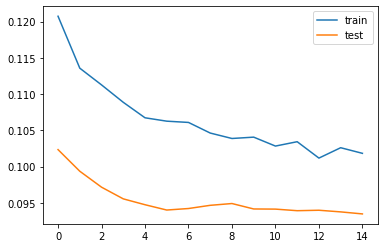

In [146]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import regularizers
# design network
model = Sequential()
model.add(LSTM(32, input_shape=(X_t.shape[1], X_t.shape[2]),dropout=0.2))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam',metrics=['accuracy'])
# fit network
history = model.fit(X_t, y_t, epochs=15, batch_size=50, validation_data=(X_v, y_v), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [147]:
from matplotlib import pyplot
pyplot.plot(history.history['mae'], label='train')
pyplot.plot(history.history['val_mae'], label='test')
pyplot.legend()
pyplot.show()

KeyError: 'mae'